Importing & Loading Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.loadtxt("dataset.csv", delimiter=",", skiprows=1)  # Skip the first row

# Separate predictor (X) and response (y) variables
X_raw = data[:, 0]  # First column as X
y_raw = data[:, 1]  # Second column as y


Normalization

In [4]:
# Normalization function
def normalize_data(data):
    return (data - np.mean(data)) / np.std(data)

# Normalize the predictor and response
X = normalize_data(X_raw).reshape(-1, 1)
y = normalize_data(y_raw).reshape(-1, 1)

# Add bias term (intercept) to X
X = np.hstack((np.ones((X.shape[0], 1)), X))


Defining Cost Function & Gradient Descent

In [5]:
# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    predictions = X.dot(weights)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Batch Gradient Descent
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = X.dot(weights)
        weights -= (learning_rate / m) * X.T.dot(predictions - y)
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history


1. Use linear regression to fit a straight line to the given database. Set your learning rate to 0.5. What are the cost function value and learning parameters values after convergence? Also, mention the convergence criteria you used.

In [6]:
# Initialize weights and parameters
weights = np.zeros((X.shape[1], 1))
learning_rate = 0.5
iterations = 50

# Train model using batch gradient descent
weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)

# Print results
print(f"Weights after convergence: {weights.ravel()}")
print(f"Final Cost: {cost_history[-1]}")


Weights after convergence: [-5.99287286e-14  6.55064426e-01]
Final Cost: 0.2854452986624983


2. The cost function that we are using in this assignment is different than the one we used in class. Can you think of the advantage of averaging the cost?

Averaging the cost ensures that the gradient magnitudes are normalized with respect to the dataset size, leading to stable optimization. This makes the learning process more robust for datasets of varying sizes.


3. Plot cost function v/s iteration graph for the model in question 1 for first 50 iterations.




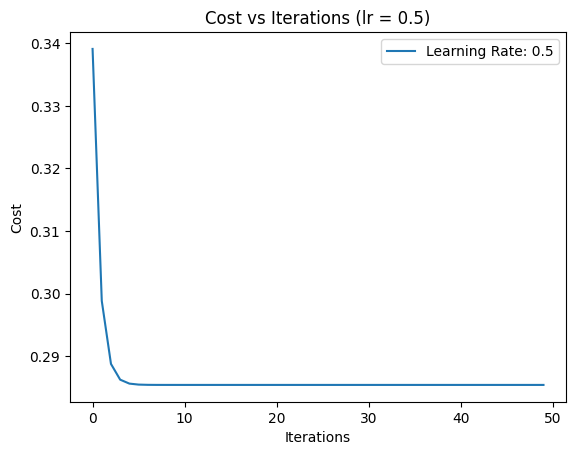

In [7]:
# Plot cost vs iterations
plt.plot(range(iterations), cost_history, label=f"Learning Rate: {learning_rate}")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations (lr = 0.5)")
plt.legend()
plt.show()


4. Plot the given dataset on a graph and also print the straight line you obtained in question 1 to show how it fits the data.

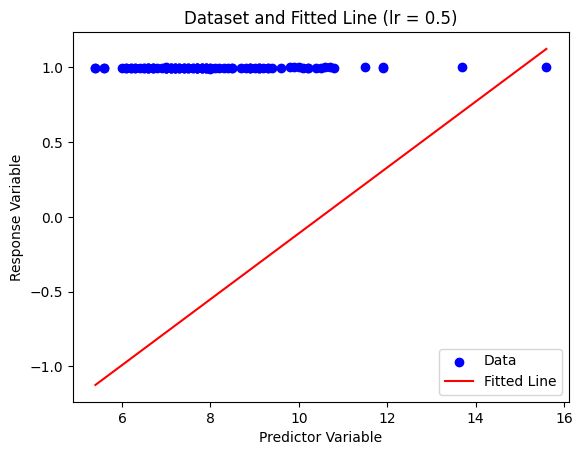

In [8]:
# Plot dataset and fitted line
plt.scatter(X_raw, y_raw, label="Data", color="blue")
line_x = np.linspace(min(X_raw), max(X_raw), 100)
line_y = weights[0] + weights[1] * normalize_data(line_x)
plt.plot(line_x, line_y, label="Fitted Line", color="red")
plt.xlabel("Predictor Variable")
plt.ylabel("Response Variable")
plt.legend()
plt.title("Dataset and Fitted Line (lr = 0.5)")
plt.show()


5. Test your regression model with the learning rates
lr = 0.005, lr = 0.5, lr = 5 For each learning rate, plot a graph showing how the cost function changes for the first 50 iterations and write your observation.

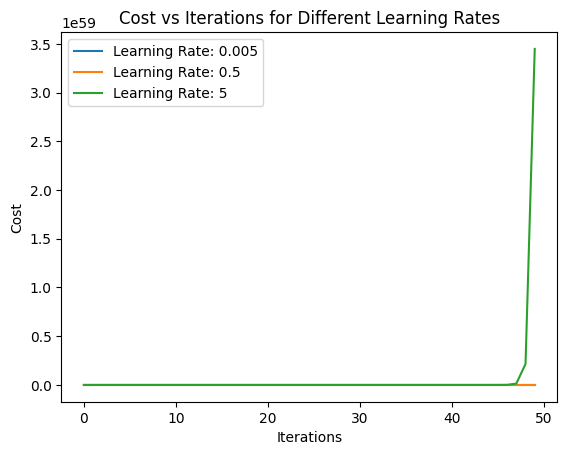

In [9]:
# Test with different learning rates
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    weights = np.zeros((X.shape[1], 1))  # Reinitialize weights
    _, cost_history = gradient_descent(X, y, weights, lr, iterations)
    plt.plot(range(iterations), cost_history, label=f"Learning Rate: {lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations for Different Learning Rates")
plt.legend()
plt.show()


6. Choose a suitable learning rate, then implement stochastic and min-batch gradient descent, plot the cost function against iteration, and observe how your cost function changes compared to batch gradient descent.

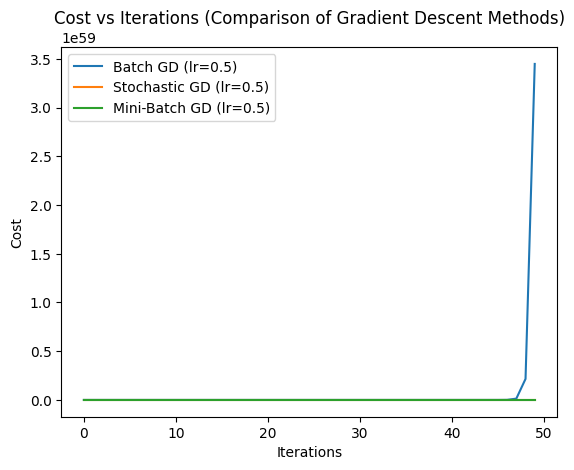

In [10]:
def stochastic_gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        for i in range(m):  # Process each sample individually
            xi = X[i:i+1]
            yi = y[i:i+1]
            prediction = xi.dot(weights)
            weights -= learning_rate * xi.T.dot(prediction - yi)
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

def mini_batch_gradient_descent(X, y, weights, learning_rate, iterations, batch_size):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):  # Process mini-batches
            X_mini = X_shuffled[i:i+batch_size]
            y_mini = y_shuffled[i:i+batch_size]
            prediction = X_mini.dot(weights)
            weights -= (learning_rate / batch_size) * X_mini.T.dot(prediction - y_mini)

        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# SGD
weights = np.zeros((X.shape[1], 1))  # Reinitialize weights
weights_sgd, cost_history_sgd = stochastic_gradient_descent(X, y, weights, learning_rate=0.5, iterations=50)

# Mini-Batch GD
weights = np.zeros((X.shape[1], 1))  # Reinitialize weights
weights_mini, cost_history_mini = mini_batch_gradient_descent(X, y, weights, learning_rate=0.5, iterations=50, batch_size=10)

# Plot
plt.plot(range(iterations), cost_history, label="Batch GD (lr=0.5)")
plt.plot(range(iterations), cost_history_sgd, label="Stochastic GD (lr=0.5)")
plt.plot(range(iterations), cost_history_mini, label="Mini-Batch GD (lr=0.5)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations (Comparison of Gradient Descent Methods)")
plt.legend()
plt.show()
